In [1]:
import warnings
import pandas as pd
import numpy as np
import collections

import matplotlib.pyplot as plt
from yellowbrick.text.freqdist import FreqDistVisualizer

########## NLP
# pre-processing 
import re 
import string 
import nltk
from nltk import tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer 
import spacy 
# topic-models 
from sklearn.decomposition import NMF, LatentDirichletAllocation

warnings.filterwarnings('ignore') # turn off warnings 
%matplotlib inline
nlp = spacy.load('en') # load spacy model
en_stopwords = set(stopwords.words('english')) # SKLEARN'S ENGLISH_STOP_WORDS TOO GREEDY
stemmer = SnowballStemmer("english", ignore_stopwords=True)

In [2]:
import spacy
import nltk
import re
import string
import sys
import pandas as pd
import numpy as np
#from stop_word_list import *
#from openfile_kn import *
import gensim
from gensim import corpora
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
# from https://nicharuc.github.io/topic_modeling/

# packages
from sklearn.feature_extraction import stop_words
#from tools import Extractor
import spacy
import nltk
import re
import string
import codecs
import numpy as np
import pandas as pd
#from user_definitions import *
import json
from sklearn.cluster import MiniBatchKMeans
import collections
from collections import OrderedDict
from sklearn.cluster import KMeans
import itertools



nlp = spacy.load('en')
STOPWORDS_DICT = {lang: set(nltk.corpus.stopwords.words(lang)) for lang in nltk.corpus.stopwords.fileids()}


def lemma_all(df, col_name):
    """
    Combines all functions used to clean and lemmatize the comments.
    :param df: data frame with comments
    :param col_name: column name in data frame containing comments
    :return: data frame with comments column lemmatized
    """

    # encode for only ascii characters
    df[col_name] = df[col_name].map(ascii_lower)


    # lemmatize words
    df[col_name] = df[col_name].map(lemma)

    # remove punctuation
    df[col_name] = df[col_name].map(punc_n)


    # filter only english comments
    df['language'] = df[col_name].map(get_language)
    df = df.loc[df['language'] == 'english']
    df = df.drop('language', axis=1)
    df[col_name] = df[col_name].map(noun_only)
    df = df[df[col_name] != ""]
    df[col_name] = df[col_name].map(lambda x: x.lower())

    return df


def ascii_lower(comment):
    """
    Parses comments and keep only ascii characters
    :param comment: a comment
    :return: comment with only ascii characters
    """
    comment = comment.encode('ascii', errors = 'ignore')
    return comment

def get_language(text):
    """
    Determines what language the comment is written in and filters only English comments.
    :param text: comment
    :return: language of comment
    """
    words = set(nltk.wordpunct_tokenize(text.lower()))
    return max(((lang, len(words & stopwords)) for lang, stopwords in STOPWORDS_DICT.items()), key = lambda x: x[1])[0]


def punc_n(comment):
    """
    Removes punctuations from comments.
    :param comment: a comment
    :return: comment without punctuations
    """
    regex = re.compile('[' + re.escape('!"#%&\'()*+,-./:;<=>?@[\\]^_`{|}~')+'0-9\\r\\t\\n]')
    nopunct = regex.sub(" ", comment)
    nopunct_words = nopunct.split(' ')
    filter_words = [word.strip() for word in nopunct_words if word != '']
    words = ' '.join(filter_words)
    return words



def lemma(comment):
    """
    Lemmatize comments using spacy lemmatizer.
    :param comment: a comment
    :return: lemmatized comment
    """

    lemmatized = nlp(comment.decode('utf-8'))
    lemmatized2 = ' '.join([t.lemma_ for t in lemmatized if t.lemma_ != '\'s'])
    return lemmatized2


#function to filter only NN/NNS or JJ/NN
def rightOrdering(list_of_tuples):
    type_of_words = zip(*list_of_tuples)[1]
    acceptable_types = ('JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NNP', 'NNPS', 'CC')
    if all(type in acceptable_types for type in type_of_words):
        all_nouns = ('NNS', 'NN', 'NNP', 'NNPS', 'CC')
        satisfy_all_nouns = all(type in all_nouns for type in type_of_words)
        satisfy_jj_condition = type_of_words[0] in ('JJ','JJR','JJS') and all(type not in ('JJ','JJR','JJS') for type in type_of_words[1:])
        return satisfy_all_nouns or satisfy_jj_condition
    return False

def noun_only(x):
    x = x.split(" ")

    if len(x[0])> 0:
        pos_comment = nltk.pos_tag(x)
        filtered = [word[0] for word in pos_comment if word[1] in ['NN', 'NNP', 'VB', 'VBD', 'VBG', 'VBN', 'VBZ']]
        #filtered = [word[0] for word in pos_comment if word[1] in ['NN', 'NNP']]
        words = ' '.join(filtered)
    return words


/Users/booranium/.local/lib/python3.6/site-packages/msgpack_numpy.py:84: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
/Users/booranium/.local/lib/python3.6/site-packages/msgpack_numpy.py:88: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr))[0]
/Users/booranium/.local/lib/python3.6/site-packages/msgpack_numpy.py:84: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
/Users/booranium/.local/lib/python3.6/site-packages/msgpack_numpy.py:84: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])


/Users/booranium/.local/lib/python3.6/site-packages/msgpack_numpy.py:84: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
/Users/booranium/.local/lib/python3.6/site-packages/msgpack_numpy.py:88: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr))[0]
/Users/booranium/.local/lib/python3.6/site-packages/msgpack_numpy.py:84: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
/Users/booranium/.local/lib/python3.6/site-packages/msgpack_numpy.py:88: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr))[0]
/Users/booranium/.lo

In [74]:
from nltk.corpus import stopwords
en_stopwords = set(stopwords.words('english'))
len(en_stopwords)

153

In [6]:
data = pd.read_pickle('../data/data_clean_v4')
data[:2]

,asin,helpful,reviewText,overall,summary,description,title,categories_clean,review_length,cat1,cat2,cat3,cat4,cat5,cat6,cat7
2,0978559088,"[1, 1]",I started taking this after both my parents di...,5.0,Bioavailability is the key,Everyone knows that resveratrol is an amazing ...,Nutrihill Resveratrol Lozenges,"Health & Personal Care, Vitamins & Dietary Sup...",1065,Health & Personal Care,Vitamins & Dietary Supplements,Supplements,Antioxidants,Resveratrol,None,None
4,0978559088,"[0, 0]",I really liked this product because it stayed ...,5.0,"I can't find this product any longer, and I wi...",Everyone knows that resveratrol is an amazing ...,Nutrihill Resveratrol Lozenges,"Health & Personal Care, Vitamins & Dietary Sup...",767,Health & Personal Care,Vitamins & Dietary Supplements,Supplements,Antioxidants,Resveratrol,None,None


In [5]:
len(data), data.asin.nunique()

(217566, 26820)

## Summarize by Categories

In [18]:
n = len(data)
count_by_cacount_by_cat3t3 = data.groupby(['cat3']).asin.count().reset_index()
count_by_cat3['prop'] = round(count_by_cat3.asin*1.0/n*1.0,2)
count_by_cat3

,cat3,asin,prop
0,Herbal Supplements,63259,0.29
1,Minerals,22340,0.10
2,Supplements,91493,0.42
3,Vitamins,40474,0.19


In [23]:
minerals = data[data.cat3 == 'Minerals']
len(minerals), minerals.asin.nunique()

(22340, 2844)

## Preprocessing - Prototype on Minerals only (10%)

from: https://github.com/nicharuc/Collocations/blob/master/cleanreviews.py

In [24]:
minerals['reviewText_ascii_lower'] = data.reviewText.map(ascii_lower)

In [29]:
minerals['reviewText_lemma'] = minerals.reviewText_ascii_lower.map(lemma)
# uses spacy lemmatization to maintain interpretability 
# updated Nicha's lemma() function to fix error: spaCy expects unicode strings, not byte strings

In [31]:
minerals['reviewText_punc'] = minerals.reviewText_lemma.map(punc_n)

In [32]:
minerals['language'] = minerals.reviewText_punc.map(get_language)

In [34]:
minerals.language.unique()
# manual checks show that this function isn't perfect -- 
# its wrongly classified english reviews as italian, danish and dutch.
# however, spanish identified reviews are truly spanish 

array(['english', 'spanish', 'italian', 'danish', 'dutch'], dtype=object)

In [50]:
minerals_eng = minerals[~(minerals.language == 'spanish')]

In [51]:
len(minerals_eng), minerals_eng.asin.nunique() # 16 spanish reviews removed 

(22324, 2841)

## Bigrams and Trigrams

from: https://medium.com/@nicharuch/collocations-identifying-phrases-that-act-like-individual-words-in-nlp-f58a93a2f84a

In [108]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

In [109]:
bigramFinder = nltk.collocations.BigramCollocationFinder.\
                from_documents([i.split() for i in minerals_eng.reviewText_punc])
trigramFinder = nltk.collocations.TrigramCollocationFinder.\
        from_documents([i.split() for i in minerals_eng.reviewText_punc])

In [110]:
#filter only those that occur at least 50 times
bigramFinder.apply_freq_filter(50)
trigramFinder.apply_freq_filter(50)

### Using Frequency

In [123]:
#bigrams
bigram_freq = bigramFinder.ngram_fd.items()
bigram_freq_tbl = pd.DataFrame(list(bigram_freq), columns=['bigram','freq']\
                                ).sort_values(by='freq', ascending=False)

#trigrams
trigram_freq = trigramFinder.ngram_fd.items()
trigram_freq_tbl = pd.DataFrame(list(trigram_freq), columns=['trigram','freq']\
                                 ).sort_values(by='freq', ascending=False)

In [267]:
def filter_gram(i):
    """
    1. keep any bigram of form: adjective+noun or noun+ noun
    or trigram of form: adj+anything+noun or noun+anything+noun 
    2a. exclude any gram containing a pronoun
    2b. exclude any gram containing: 'i', 't', 've' (comes from special char removal)
    3. exclude anything else 
    """
    if any(term in i for term in ['PRON', 't', 've', 'i']):
        return False
    else:
        tag = nltk.pos_tag(i)
        if tag[0][1] in ['JJ', 'NN'] and tag[-1][1] in ['NN']:
            return True
        else:
            return False

In [268]:
bigram_freq_tbl_filtered = bigram_freq_tbl[bigram_freq_tbl.bigram.apply(filter_gram)]
trigram_freq_tbl_filtered = trigram_freq_tbl[trigram_freq_tbl.trigram.apply(filter_gram)]

In [269]:
len(bigram_freq_tbl), len(bigram_freq_tbl_filtered), len(trigram_freq_tbl), len(trigram_freq_tbl_filtered)

(3150, 232, 1724, 38)

In [270]:
bigram_freq_ls = [' '.join(x) for x in bigram_freq_tbl_filtered.bigram.values]
trigram_freq_ls = [' '.join(x) for x in trigram_freq_tbl_filtered.trigram.values]

In [273]:
bigram_freq_ls[:5]

['great product',
 'side effect',
 'iron supplement',
 'vitamin d',
 'colloidal silver']

In [274]:
trigram_freq_ls[:5]

['use this product',
 'time a day',
 'form of magnesium',
 'health food store',
 'purchase this product']

### Using Pointwise Mutual Information (PMI)

In [117]:
bigram_scores = bigramFinder.score_ngrams(bigram_measures.pmi)
trigram_scores = trigramFinder.score_ngrams(trigram_measures.pmi)

In [120]:
bigram_pmi_tbl = pd.DataFrame(bigram_scores)
bigram_pmi_tbl.columns = ['bigram', 'pmi']
bigram_pmi_tbl.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)

trigram_pmi_tbl = pd.DataFrame(trigram_scores)
trigram_pmi_tbl.columns = ['trigram', 'pmi']
trigram_pmi_tbl.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)

In [340]:
# filter based on pos-pattern, etc. 
bigram_pmi_tbl_filtered = bigram_pmi_tbl[bigram_pmi_tbl.bigram.apply(filter_gram)]
trigram_pmi_tbl_filtered = trigram_pmi_tbl[trigram_pmi_tbl.trigram.apply(filter_gram)]

In [299]:
# filter based on pmi score : start at 75th percentile of pmi score and eyeball
#bigram_pmi_tbl_filtered = bigram_pmi_tbl[bigram_pmi_tbl.pmi > 7]
#trigram_pmi_tbl_filtered = trigram_pmi_tbl[trigram_pmi_tbl.pmi>12]


In [300]:
bigram_pmi_ls = [' '.join(x) for x in bigram_pmi_tbl_filtered.bigram.values]
trigram_pmi_ls = [' '.join(x) for x in trigram_pmi_tbl_filtered.trigram.values]

### NEED TO COLLAPSE SYNONYM - SAME EXPRESSIONS!!! 

Retain filtering on the frequency based bigrams and trigrams  
Keep all PMI-identified grams and collapse full list 

In [385]:
bigram_pmi_tbl_filtered.bigram.values

array([('gastric', 'bypass'), ('garcinia', 'cambogia'),
       ('expiration', 'date'), ('kidney', 'stone'),
       ('ferrous', 'sulfate'), ('bowel', 'movement'),
       ('chromium', 'picolinate'), ('slow', 'fe'),
       ('medicine', 'cabinet'), ('acid', 'reflux'), ('fall', 'asleep'),
       ('heart', 'palpitation'), ('cal', 'mag'), ('family', 'member'),
       ('sore', 'throat'), ('breast', 'cancer'), ('customer', 'service'),
       ('slow', 'release'), ('fish', 'oil'), ('immune', 'system'),
       ('orange', 'juice'), ('restless', 'leg'), ('normal', 'range'),
       ('blood', 'pressure'), ('bone', 'density'), ('life', 'saver'),
       ('potassium', 'iodide'), ('sovereign', 'silver'),
       ('regular', 'basis'), ('colloidal', 'silver'),
       ('lugol', 'solution'), ('sinus', 'infection'), ('weight', 'loss'),
       ('ear', 'infection'), ('trace', 'mineral'), ('long', 'term'),
       ('side', 'effect'), ('dr', 'oz'), ('lose', 'lb'),
       ('empty', 'stomach'), ('muscle', 'spasm'), ('

In [386]:
small

NameError: name 'small' is not defined

### Concatenate lists from both methods 

In [303]:
bigrams = list(set(bigram_freq_ls + bigram_pmi_ls))
trigrams = list(set(trigram_freq_ls + trigram_pmi_ls))

In [304]:
len(bigrams), len(trigrams)

(232, 38)

In [307]:
grams = bigrams + trigrams

### Replace grams in text

In [308]:
# replace the word with selected ngram
def gram_concat(text):
    text1 = text.lower()
    for i in grams:
        raw = str(' '.join(i))
        clean = str('_'.join(i))
        text1 = text1.replace(raw, clean)
    return text1

In [314]:
# replace grams 
minerals_eng['reviewText_grammed'] = minerals_eng.reviewText_punc.map(gram_concat)

In [348]:
# remove 'PRON' token
minerals_eng.reviewText_grammed = minerals_eng.reviewText_grammed.apply(lambda x: x.replace('pron', ''))

In [356]:
# manual cleaning based on iterations of examining count vectorizer features 
def clean_tokes(string):
    string_clean = re.sub(r'^(\\)', '', string)
    string_clean = re.sub(r'(\+)$', '', string_clean)
    string_clean = re.sub(r'^(_+)', '', string_clean)
    string_clean = re.sub(r'(_+)$', '', string_clean)
    string_clean = re.sub(r'(a+)$', '', string_clean)
    string_clean = re.sub(r'(z+)$', '', string_clean)
    return string_clean

In [359]:
minerals_eng['reviewText_grammed2'] = minerals_eng.reviewText_grammed.apply(clean_tokes)

## Plot token frequency

In [377]:
excludes = ['$','a','aa','aaa','aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaplus','zza','zzz']

def tokenize(text):   
    tokens = nltk.word_tokenize(text)
    tokens = [i for i in tokens if i not in en_stopwords]
    tokens = [i for i in tokens if i not in excludes]
    return tokens 

corpus = minerals_eng.reviewText_grammed2
vectorizer_spaced = CountVectorizer(tokenizer = tokenize)
docs_spaced = vectorizer_spaced.fit_transform(corpus)
features_spaced = vectorizer_spaced.get_feature_names()

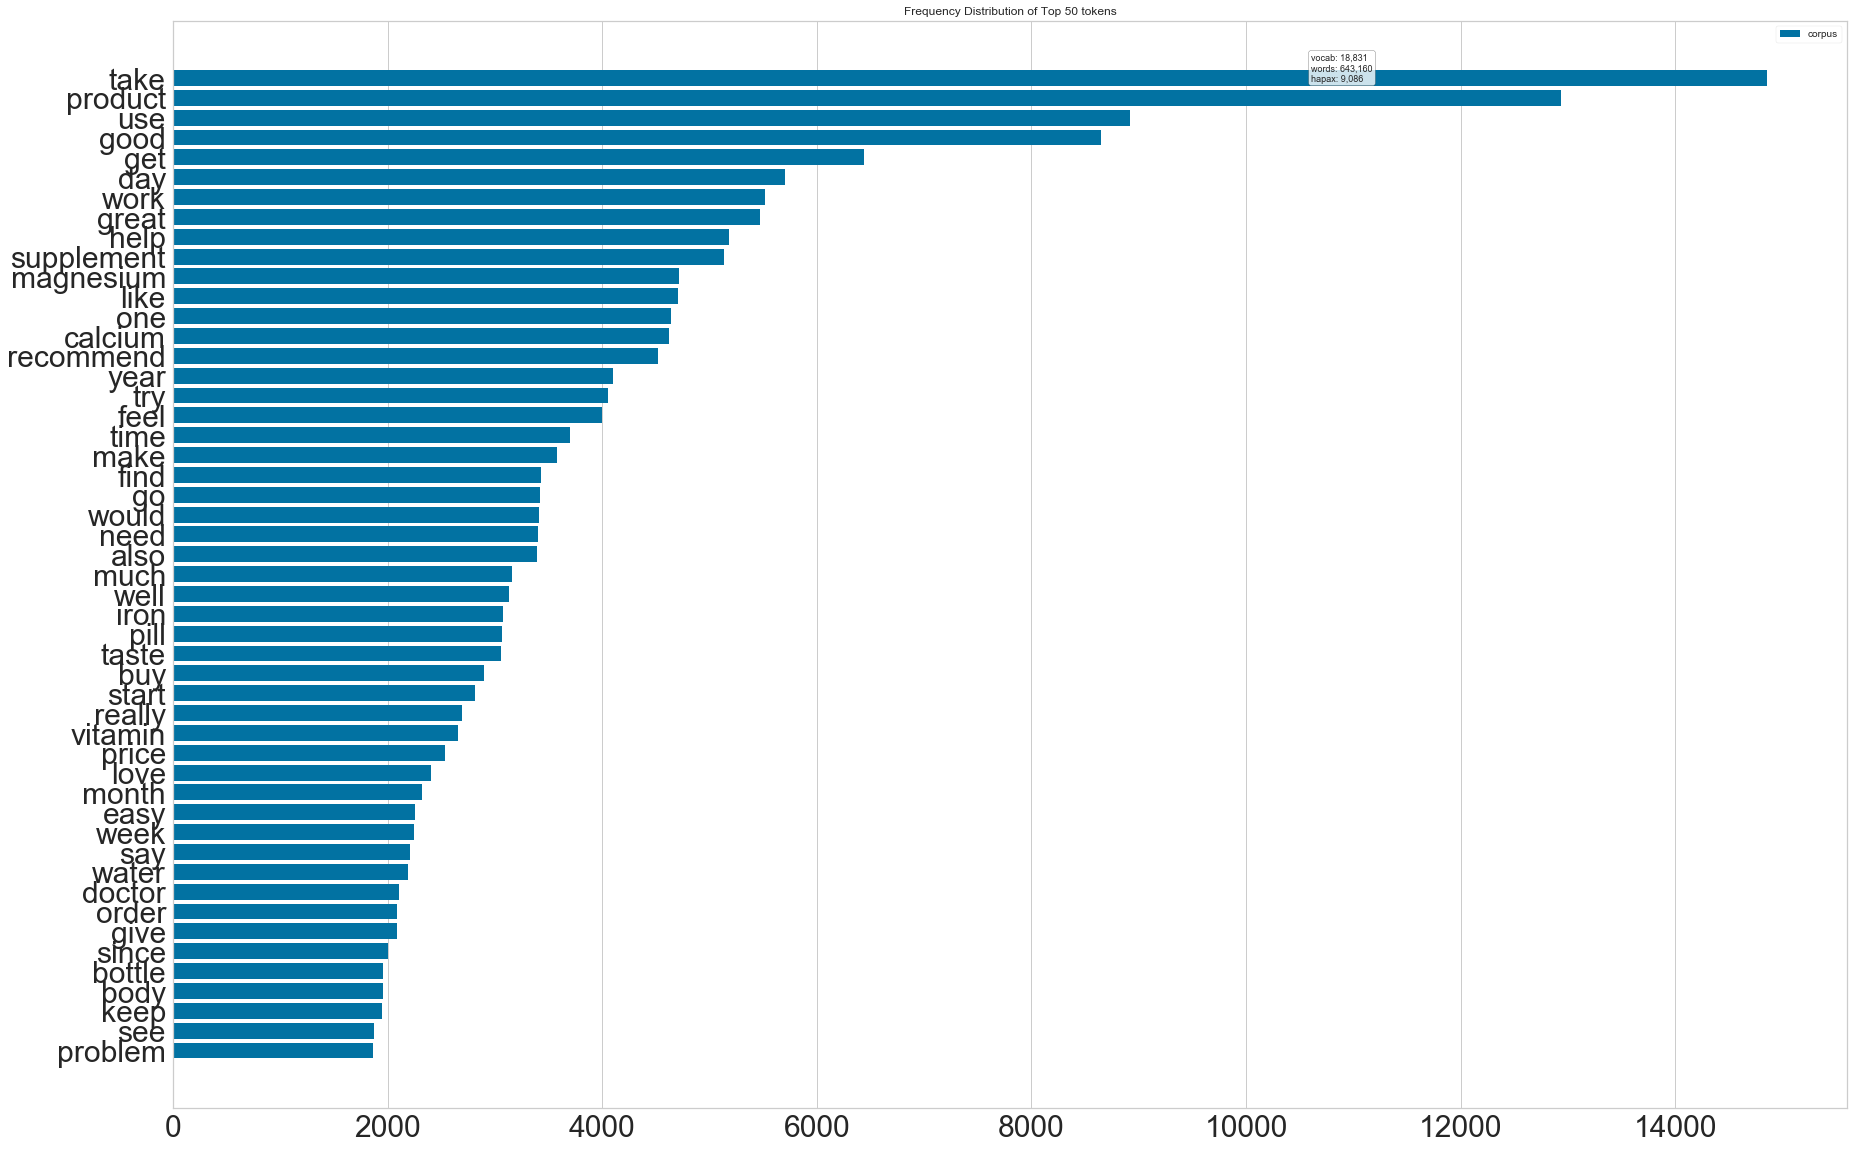

In [378]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 20))  # the size you want
plt.tick_params(labelsize=30)

visualizer_spaced = FreqDistVisualizer(features=features_spaced)
visualizer_spaced.fit(docs_spaced)
visualizer_spaced.poof()

## NMF

In [380]:
feature_names = vectorizer_spaced.get_feature_names()

In [ ]:
for n in [4,5,6,7]:
    nmf = NMF(n_components=n, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(docs)
    # if n_components=no_topics --> all features are kept
    print('Num. Topics: ', n)
    num_top_words = 20
    for topic_idx, topic in enumerate(nmf.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-num_top_words - 1:-1]]))
    print('')

## LDA

In [381]:
for n in [4,5,6,7]:
    lda = LatentDirichletAllocation(n_topics=n, max_iter=5, learning_method='online',\
                                    learning_offset=50.,random_state=0).fit(docs)
    print('Num. Topics: ', n)
    num_top_words = 10
    for topic_idx, topic in enumerate(lda.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-num_top_words - 1:-1]]))
    print('')

Num. Topics:  4
Topic 0:
beau andes third tothe heading tics formally omd nuked tbeen
Topic 1:
wfit temples flintstones addendum chigger calimagic january liqumins qualityhighly choose
Topic 2:
varie third skid option incredibly omd collective andes colorless staple
Topic 3:
mal smoothiemmvsp norco incredibly omd herbalistic andes craziness nac lexapro

Num. Topics:  5
Topic 0:
omd third incredibly irradiated beau andes toffee mal tothe fuel
Topic 1:
chigger choose flintstones caprotein dora luke calimagic habe tender haave
Topic 2:
skid damaging varie collective ooh colorless staple inhalant wfit speedily
Topic 3:
smoothiemmvsp norco craziness nac lexapro mal herbalistic january bees cambodia
Topic 4:
beau andes third tothe heading tics formally omd nuked tbeen

Num. Topics:  6
Topic 0:
irradiated omd incredibly third toffee varie ooh collective inhalant dual
Topic 1:
skid colorless heathy dora luke approach staple business prepared ulcers
Topic 2:
calimagic damaging walls boomer clar

IndexError: list index out of range